# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)



In [2]:
def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()


jet = imread('jet.png')
kw = imread('kw.png')
moon = imread('moon.png')
lena_noise = imread('lenaSzum.png')
lena = imread('lena.png')
board = imread('plansza.png')

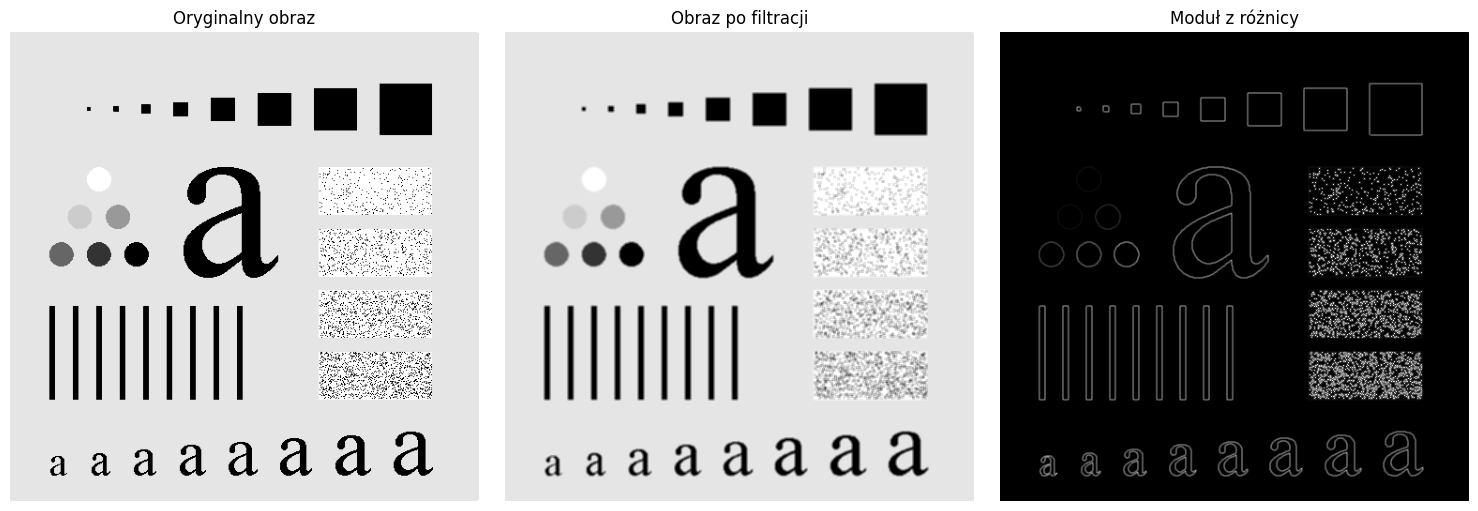

In [3]:
kernel = np.ones((3, 3), dtype=np.float32) / 9.0
filtered_image = cv2.filter2D(board, -1, kernel, borderType=cv2.BORDER_DEFAULT)
difference = cv2.absdiff(board, filtered_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(board, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Obraz po filtracji")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Moduł z różnicy")
plt.imshow(difference, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

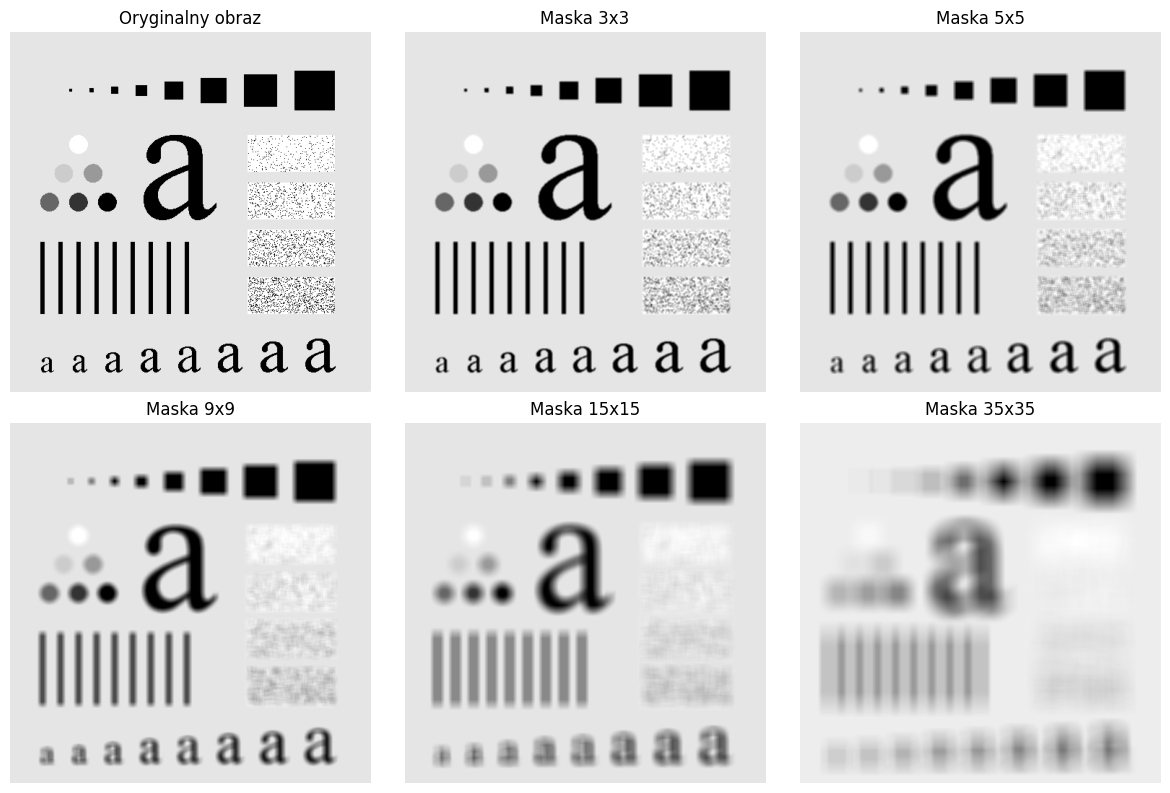

In [4]:
def apply_mean_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    return cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT)

kernel_sizes = [3, 5, 9, 15, 35]

filtered_images = [apply_mean_filter(board, size) for size in kernel_sizes]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(board, cmap='gray')
plt.axis('off')

for i, (filtered_image, size) in enumerate(zip(filtered_images, kernel_sizes)):
    plt.subplot(2, 3, i + 2)
    plt.title(f"Maska {size}x{size}")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

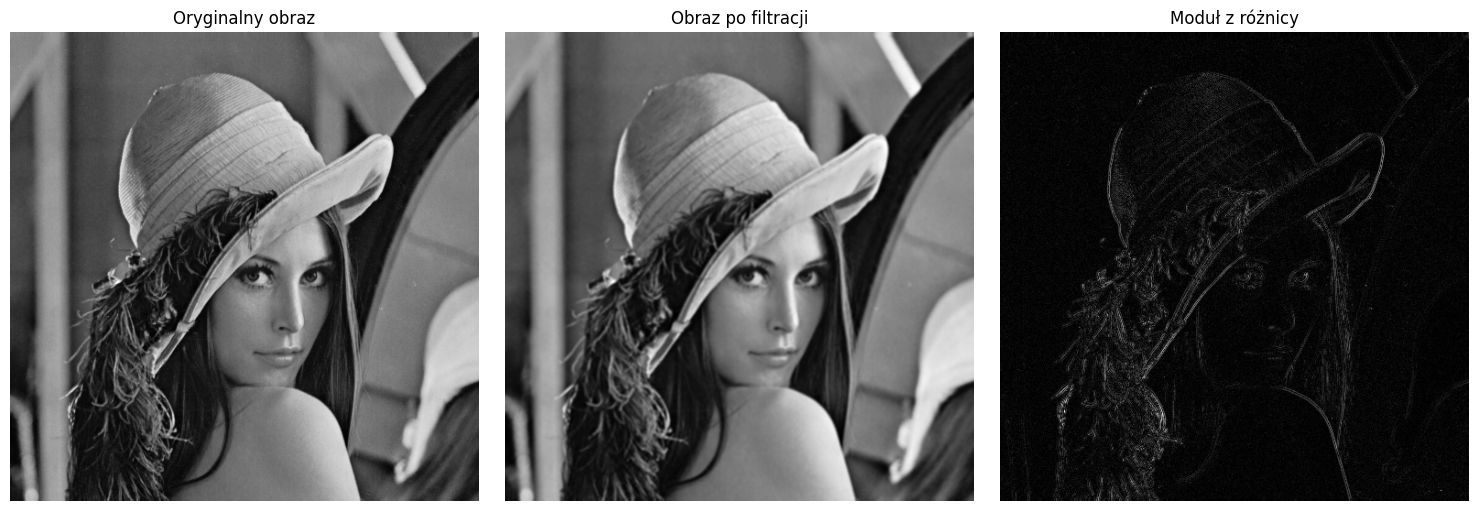

In [5]:
kernel = np.ones((3, 3), dtype=np.float32) / 9.0
filtered_image = cv2.filter2D(lena, -1, kernel, borderType=cv2.BORDER_DEFAULT)
difference = cv2.absdiff(lena, filtered_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(lena, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Obraz po filtracji")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Moduł z różnicy")
plt.imshow(difference, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

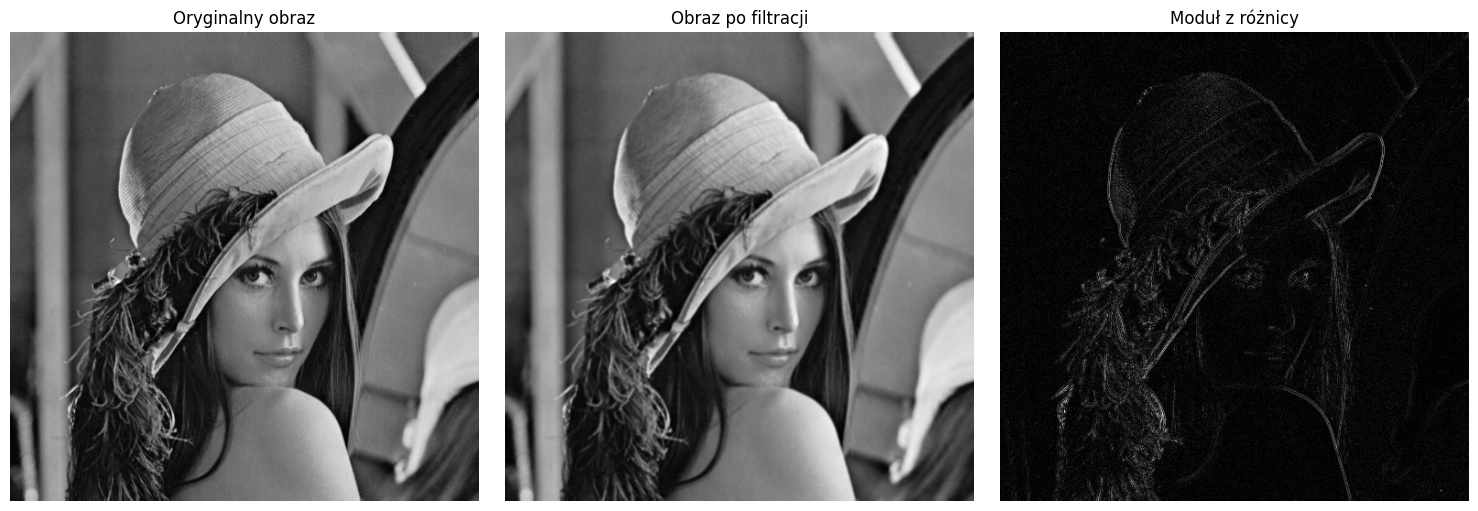

In [6]:
M = np.array([[1, 2, 1], 
              [2, 4, 2], 
              [1, 2, 1]])
kernel = M / np.sum(M)

filtered_image = cv2.filter2D(lena, -1, kernel, borderType=cv2.BORDER_DEFAULT)
difference = cv2.absdiff(lena, filtered_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(lena, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Obraz po filtracji")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Moduł z różnicy")
plt.imshow(difference, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [7]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    
    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
#     ax.plot_surface(X, Y, Z)
#     plt.show()
    return X, Y, Z


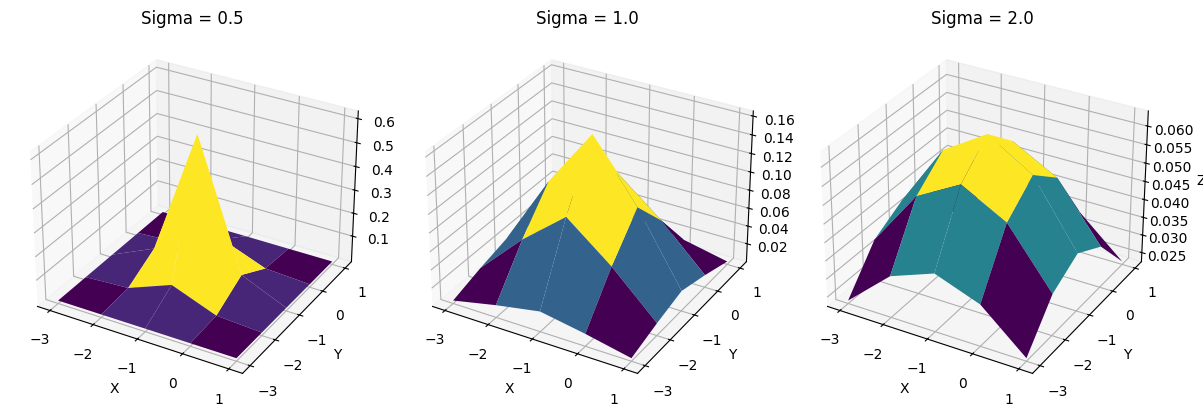

In [8]:
size = 5
sigma_values = [0.5, 1.0, 2.0]

fig = plt.figure(figsize=(12, 4))
for i, sigma in enumerate(sigma_values):
    kernel = fgaussian(size, sigma)
    X, Y, Z = mesh(kernel, size)
    
    ax = fig.add_subplot(1, len(sigma_values), i + 1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f"Sigma = {sigma}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


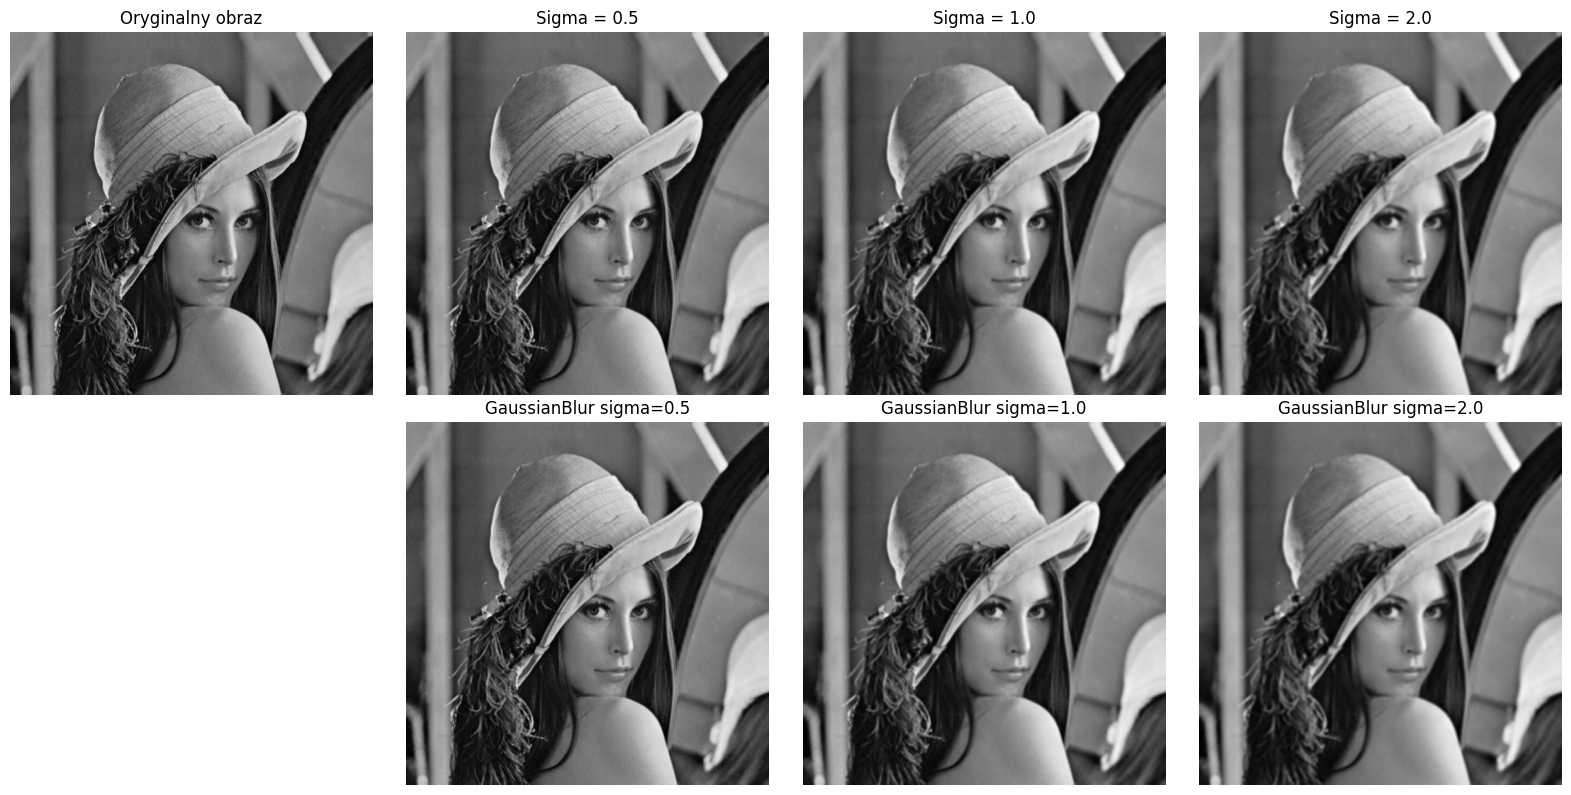

In [9]:
filtered_images = []
opencv_filtered_images = []
size = 5

for sigma in sigma_values:
    kernel = fgaussian(size, sigma)
    filtered_image = cv2.filter2D(lena, -1, kernel, borderType=cv2.BORDER_DEFAULT)
    filtered_images.append((sigma, filtered_image))

    opencv_filtered_images.append(cv2.GaussianBlur(lena, (size, size), sigmaX=sigma, borderType=cv2.BORDER_DEFAULT))

plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Oryginalny obraz")
plt.imshow(lena, cmap='gray')
plt.axis('off')

for i, (sigma, filtered_image) in enumerate(filtered_images):
    plt.subplot(2, 4, i + 2)
    plt.title(f"Sigma = {sigma}")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

for i, filtered_image in enumerate(opencv_filtered_images):
    plt.subplot(2, 4, i + 6)
    plt.title(f"GaussianBlur sigma={sigma_values[i]}")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


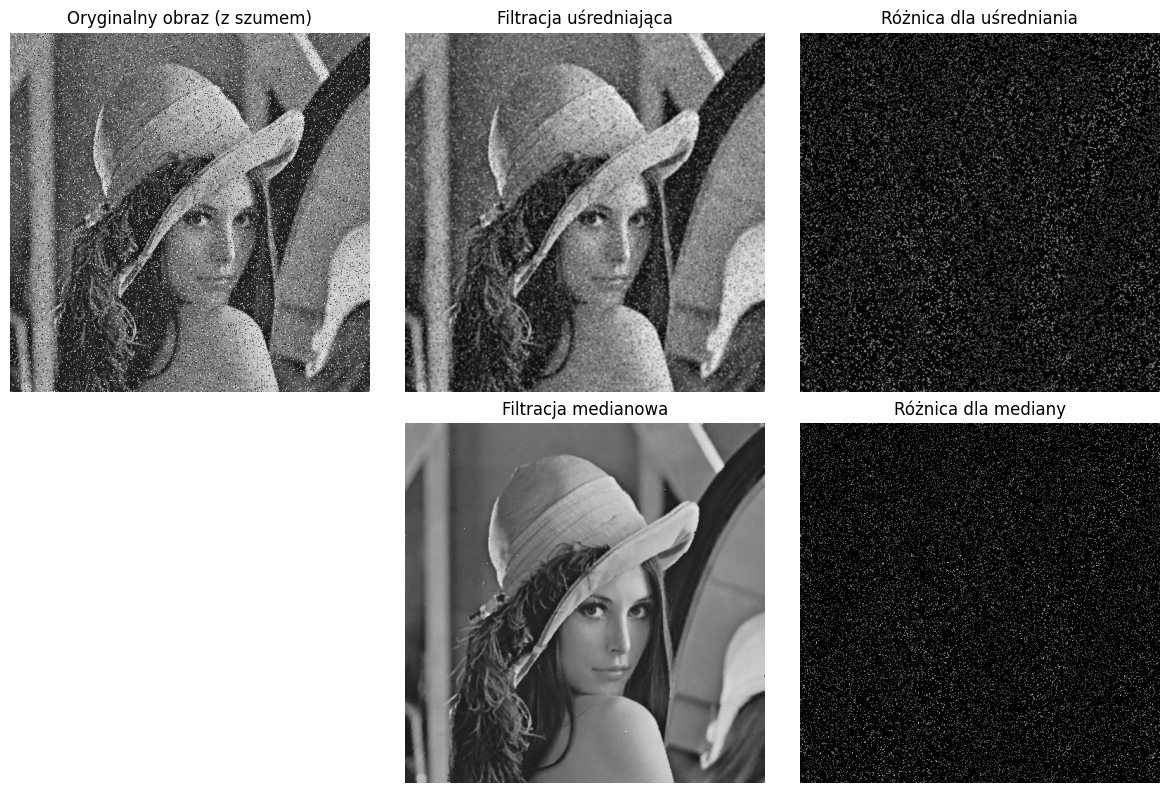

In [10]:
kernel = np.ones((3, 3), dtype=np.float32) / 9.0
filtered_image_avg = cv2.filter2D(lena_noise, -1, kernel, borderType=cv2.BORDER_DEFAULT)
difference_avg = cv2.absdiff(lena_noise, filtered_image_avg)

filtered_image_median =cv2.medianBlur(lena_noise, 3)
difference_median = cv2.absdiff(lena_noise, filtered_image_median)

results = [
    ("Filtracja uśredniająca", filtered_image_avg, "Różnica dla uśredniania", difference_avg),
    ("Filtracja medianowa", filtered_image_median, "Różnica dla mediany", difference_median),
]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Oryginalny obraz (z szumem)")
plt.imshow(lena_noise, cmap='gray')
plt.axis('off')

for i, (filter_title, filtered_image, diff_title, difference) in enumerate(results):
    plt.subplot(2, 3, i * 3 + 2)
    plt.title(filter_title)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, i * 3 + 3)
    plt.title(diff_title)
    plt.imshow(difference, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

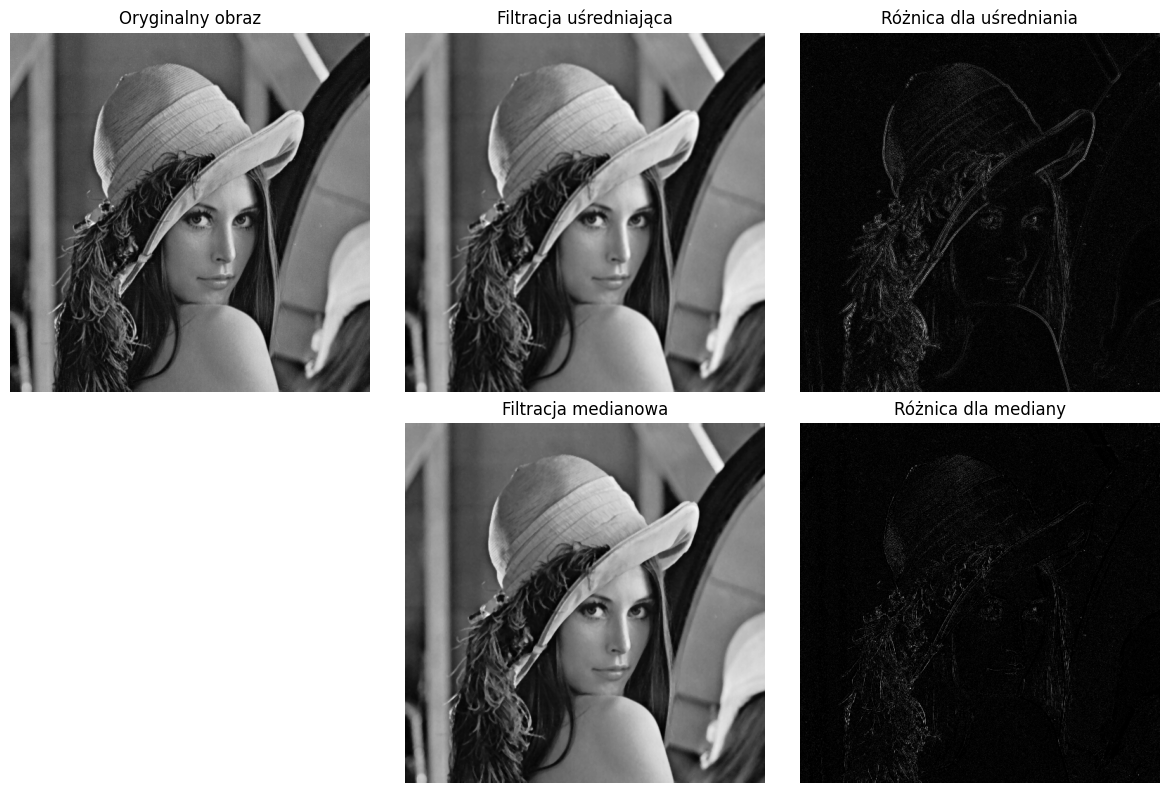

In [11]:
kernel = np.ones((3, 3), dtype=np.float32) / 9.0
filtered_image_avg = cv2.filter2D(lena, -1, kernel, borderType=cv2.BORDER_DEFAULT)
difference_avg = cv2.absdiff(lena, filtered_image_avg)

filtered_image_median =cv2.medianBlur(lena, 3)
difference_median = cv2.absdiff(lena, filtered_image_median)

results = [
    ("Filtracja uśredniająca", filtered_image_avg, "Różnica dla uśredniania", difference_avg),
    ("Filtracja medianowa", filtered_image_median, "Różnica dla mediany", difference_median),
]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(lena, cmap='gray')
plt.axis('off')

for i, (filter_title, filtered_image, diff_title, difference) in enumerate(results):
    plt.subplot(2, 3, i * 3 + 2)
    plt.title(filter_title)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, i * 3 + 3)
    plt.title(diff_title)
    plt.imshow(difference, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

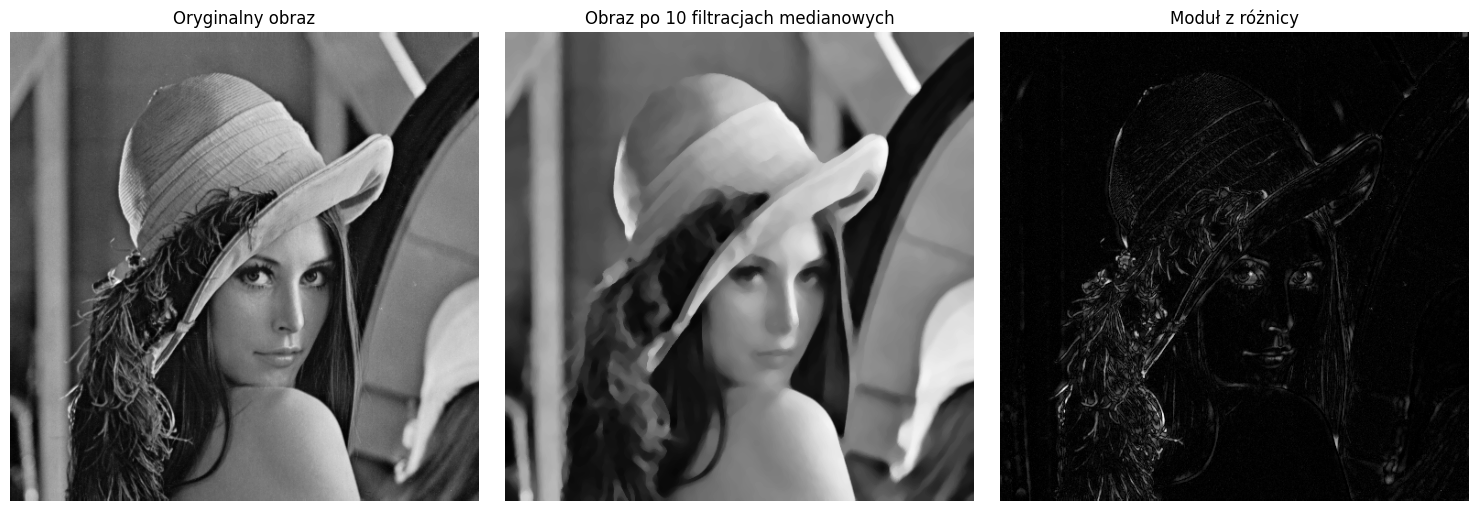

In [12]:
filtered_image =  lena
for i in range(10):
    filtered_image = cv2.medianBlur(filtered_image, 5)
difference = cv2.absdiff(lena, filtered_image)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(lena, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Obraz po 10 filtracjach medianowych")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Moduł z różnicy")
plt.imshow(difference, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

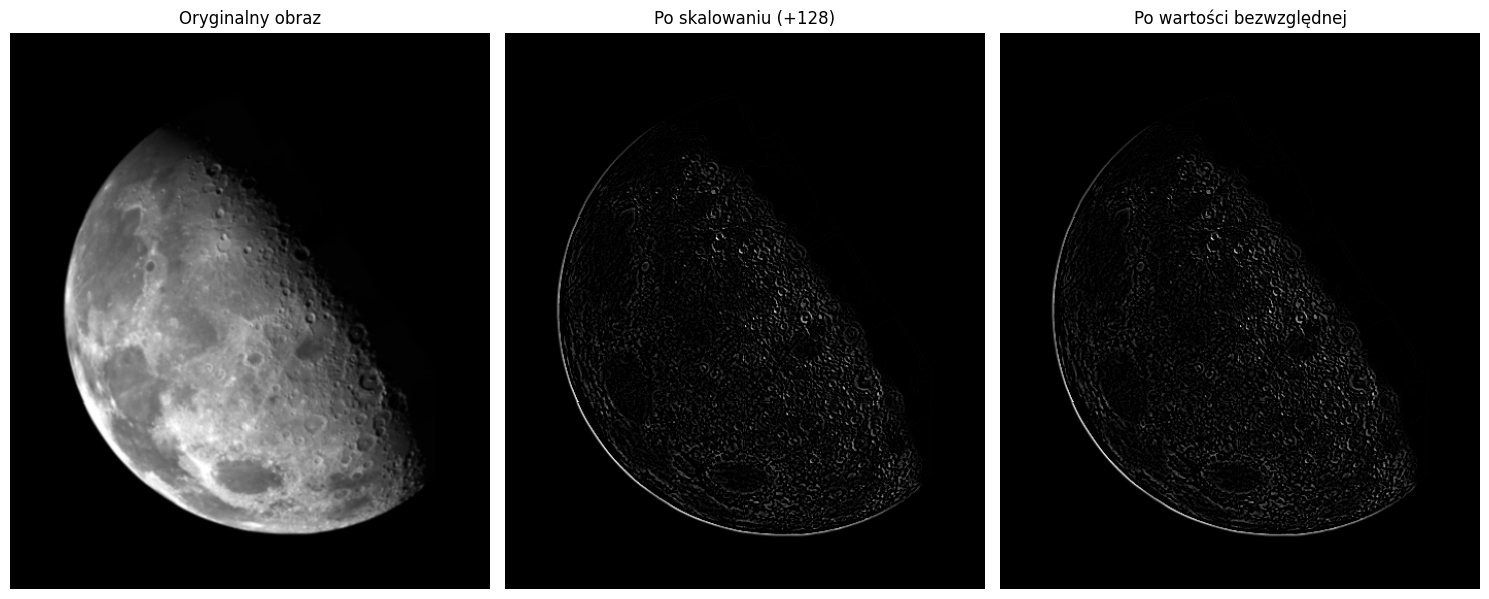

In [13]:
laplacian = np.array([[0,  1, 0],
                      [1, -4, 1],
                      [0,  1, 0]])

filtered_image = cv2.filter2D(moon, -1, laplacian, borderType=cv2.BORDER_DEFAULT)
scaled_image = cv2.add(filtered_image, 128)
absolute_image = cv2.convertScaleAbs(filtered_image)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(moon , cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Po skalowaniu (+128)")
plt.imshow(scaled_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Po wartości bezwzględnej")
plt.imshow(absolute_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



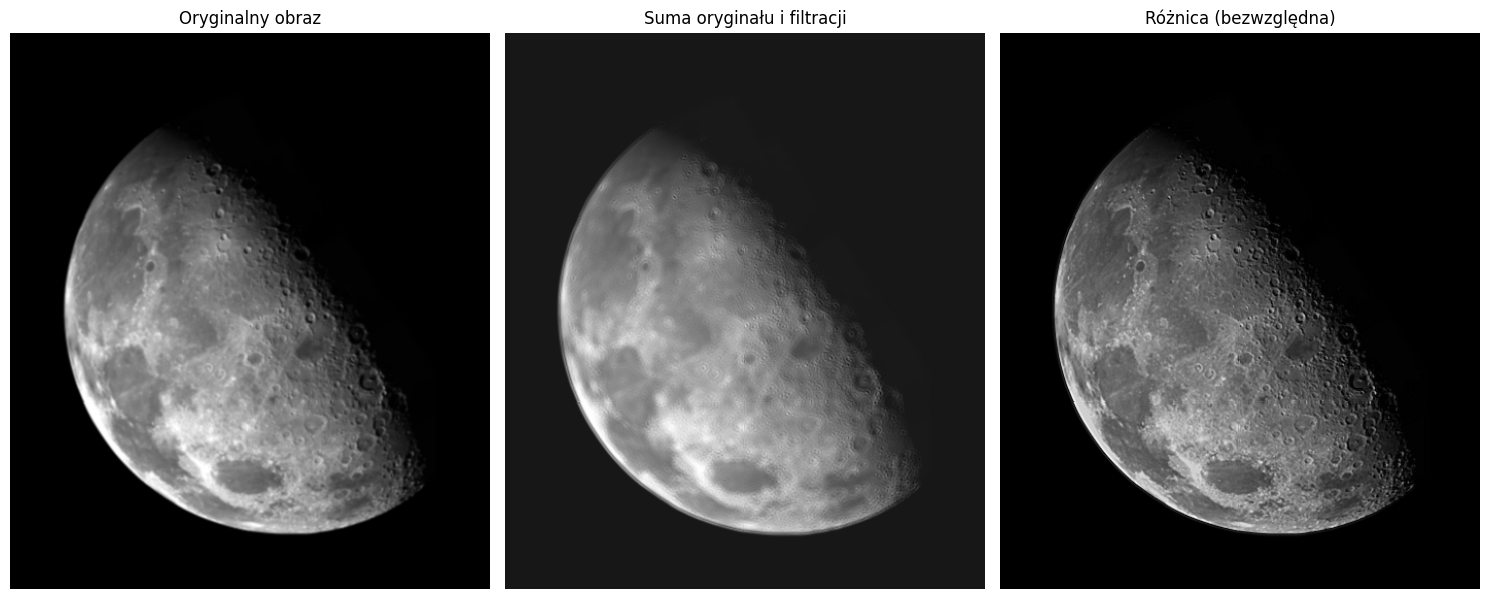

In [14]:
moon_signed = moon.astype(np.int16)

laplacian = np.array([[0,  1, 0],
                      [1, -4, 1],
                      [0,  1, 0]])

filtered_image = cv2.filter2D(moon_signed, -1, laplacian, borderType=cv2.BORDER_DEFAULT)
sharpened_image = moon_signed + filtered_image
difference_image = cv2.absdiff(moon_signed, filtered_image)

sharpened_image_normalized = cv2.normalize(sharpened_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
difference_image_normalized = cv2.normalize(difference_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(moon, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Suma oryginału i filtracji")
plt.imshow(sharpened_image_normalized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Różnica (bezwzględna)")
plt.imshow(difference_image_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [20]:
R1 = np.array([[ 0, 0, 0],
               [-1, 0, 0],
               [ 0, 1, 0]])
R2 = np.array([[ 0, 0,  0],
               [ 0, 0, -1],
               [ 0, 1,  0]])

P1 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])
P2 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]])

S1 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
S2 = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

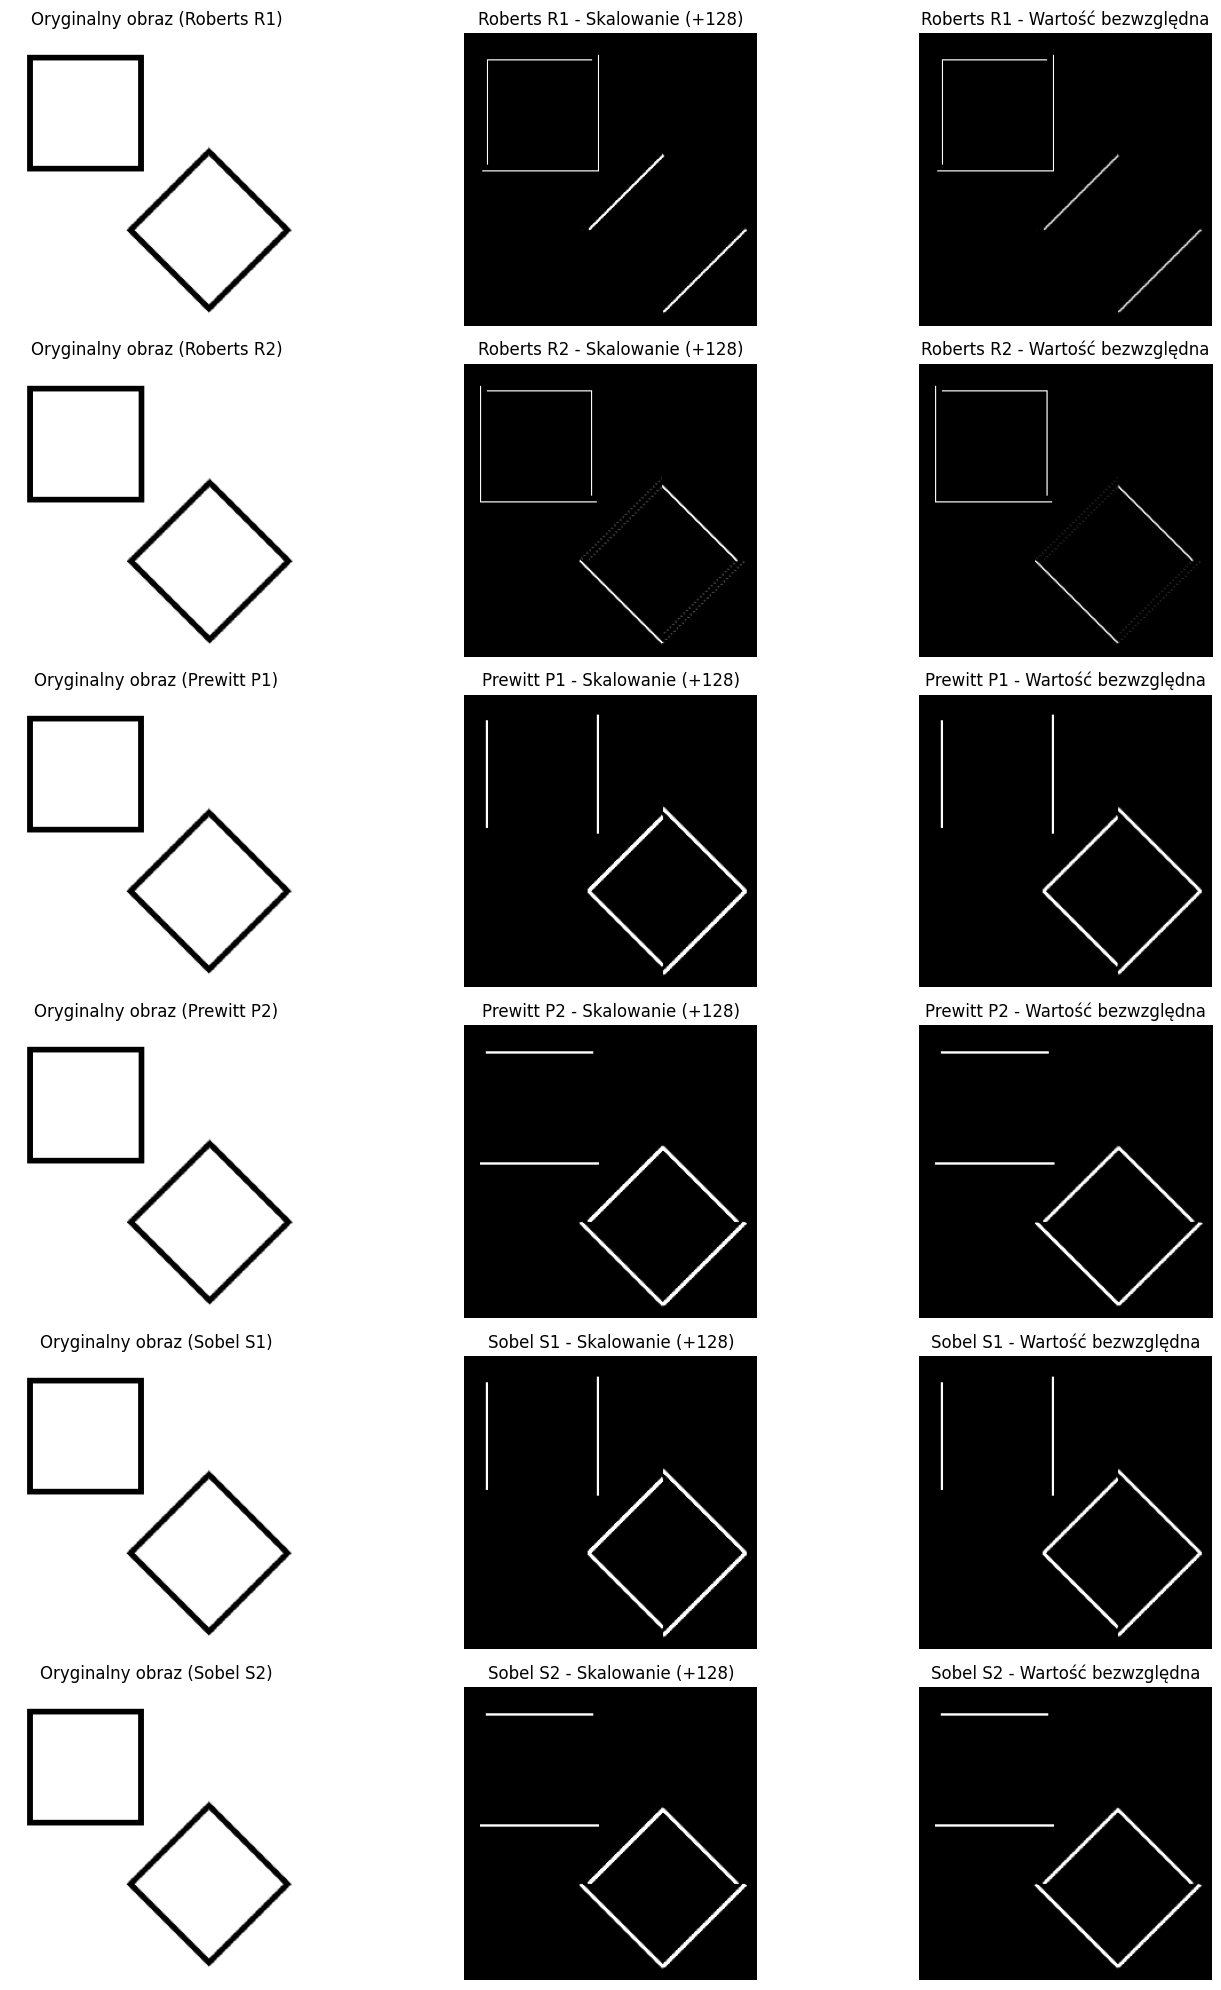

In [21]:
masks = [("Roberts R1", R1), ("Roberts R2", R2),
         ("Prewitt P1", P1), ("Prewitt P2", P2),
         ("Sobel S1", S1), ("Sobel S2", S2)]

results = []
for name, mask in masks:
    filtered_image = cv2.filter2D(kw, -1, mask, borderType=cv2.BORDER_DEFAULT)
    scaled_image = cv2.add(filtered_image, 128)
    absolute_image = cv2.convertScaleAbs(filtered_image)
    results.append((name, scaled_image, absolute_image))

plt.figure(figsize=(15, 20))

for i, (name, scaled_image, absolute_image) in enumerate(results):
    plt.subplot(len(results), 3, i * 3 + 1)
    plt.title(f"Oryginalny obraz ({name})")
    plt.imshow(kw, cmap='gray')
    plt.axis('off')

    plt.subplot(len(results), 3, i * 3 + 2)
    plt.title(f"{name} - Skalowanie (+128)")
    plt.imshow(scaled_image, cmap='gray')
    plt.axis('off')

    plt.subplot(len(results), 3, i * 3 + 3)
    plt.title(f"{name} - Wartość bezwzględna")
    plt.imshow(absolute_image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



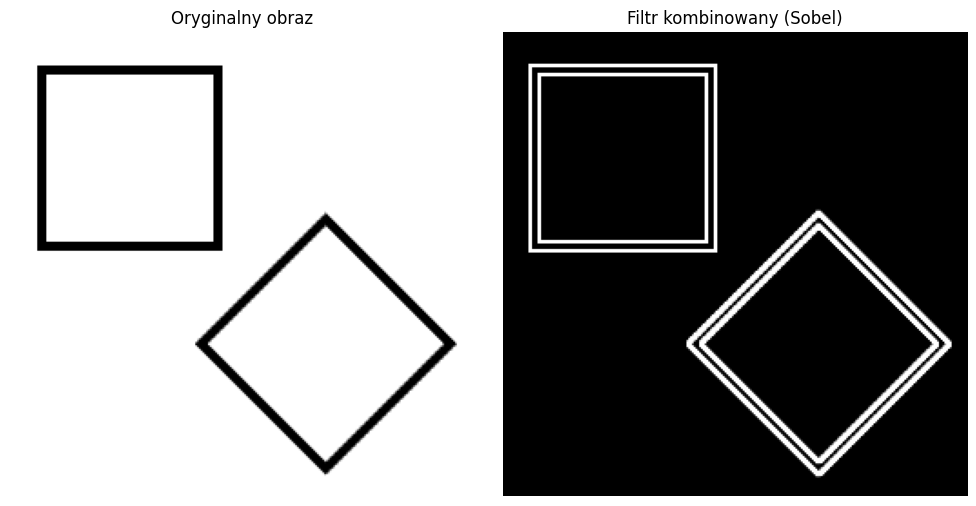

In [17]:
image_signed = kw.astype(np.int16)  

filtered1 = cv2.filter2D(image_signed, -1, S1, borderType=cv2.BORDER_DEFAULT)
filtered2 = cv2.filter2D(image_signed, -1, S2, borderType=cv2.BORDER_DEFAULT)

combined = np.sqrt(np.square(filtered1, dtype=np.float64) + np.square(filtered2, dtype=np.float64))
combined_normalized = cv2.convertScaleAbs(combined) 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(kw, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtr kombinowany (Sobel)")
plt.imshow(combined_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

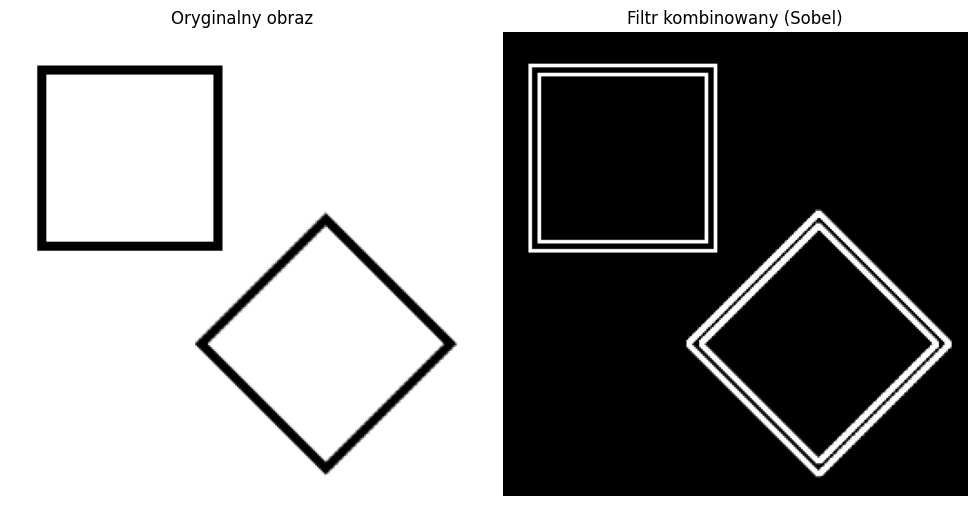

In [18]:
image_signed = kw.astype(np.int16)  

filtered1 = cv2.filter2D(image_signed, -1, S1, borderType=cv2.BORDER_DEFAULT)
filtered2 = cv2.filter2D(image_signed, -1, S2, borderType=cv2.BORDER_DEFAULT)

combined_alternative = np.abs(filtered1) + np.abs(filtered2)
combined_normalized = cv2.convertScaleAbs(combined_alternative)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(kw, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtr kombinowany (Sobel)")
plt.imshow(combined_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

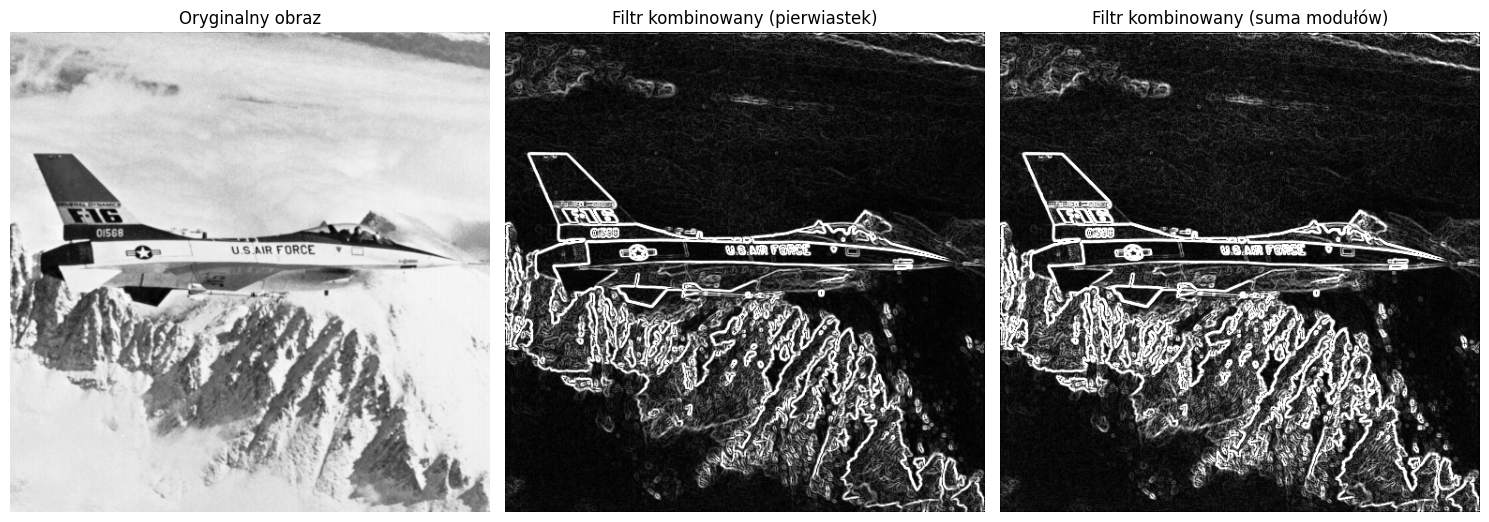

In [19]:
image_signed = jet.astype(np.int16)

filtered1 = cv2.filter2D(image_signed, -1, S1, borderType=cv2.BORDER_DEFAULT)
filtered2 = cv2.filter2D(image_signed, -1, S2, borderType=cv2.BORDER_DEFAULT)

combined_root = np.sqrt(np.square(filtered1, dtype=np.float64) + np.square(filtered2, dtype=np.float64))
combined_root_normalized = cv2.convertScaleAbs(combined_root)

combined_abs = np.abs(filtered1) + np.abs(filtered2)
combined_abs_normalized = cv2.convertScaleAbs(combined_abs)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1) 
plt.title("Oryginalny obraz")
plt.imshow(jet, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Filtr kombinowany (pierwiastek)")
plt.imshow(combined_root_normalized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Filtr kombinowany (suma modułów)")
plt.imshow(combined_abs_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()